<h1> Capstone Data Wrangling Module </h1>
<p> Per my mentor's advice, here is my data wrangling submission for module 12.5.  I spent most of the time just trying to find 4-leaf clover pictures on the internet.  Instagram has by far the largest set.  I screen captured a large set of 4-leaf clovers from Instagram and Twitter.  I then wrote a simple .NET Winforms program that help me very quickly crop the 4-leaf clover pics from the screen captures and save them to a target folder.  I use the same program to parse through 3-leaf clover images that I took with my Iphone to creat a 3-leaf clover set.    
    
   

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


<h1>Load the Raw Data and Display Some Samples:</h1>

In [18]:
DATADIR = ".\Data"
CATEGORIES= ["3-Leaf Clover", "4-Leaf Clover"]

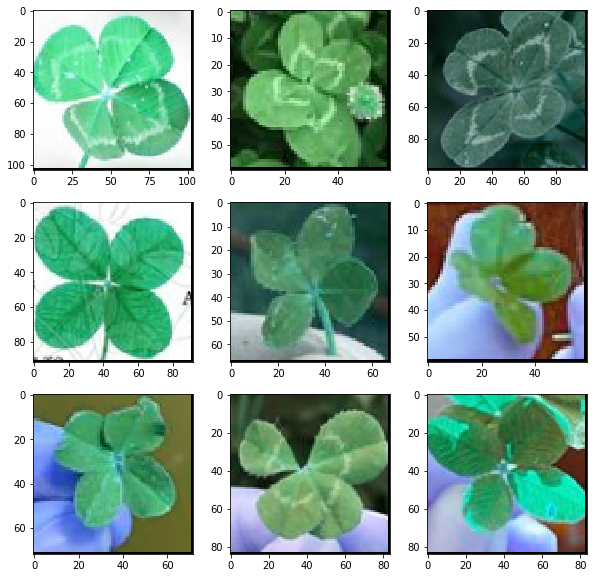

In [28]:
raw_image_4leaf_clovers=[]
raw_image_3leaf_clovers=[]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        
        img_array = cv2.imread(os.path.join(path,img))
        if (category=="3-Leaf Clover"):
            raw_image_3leaf_clovers.append(img_array)
        else:
            raw_image_4leaf_clovers.append(img_array)
            
            
f, axarr = plt.subplots(3,3, figsize=(10,10))
for i in range(3):
    for j in range(3):
        axarr[i,j].imshow(raw_image_4leaf_clovers[3*i+j])




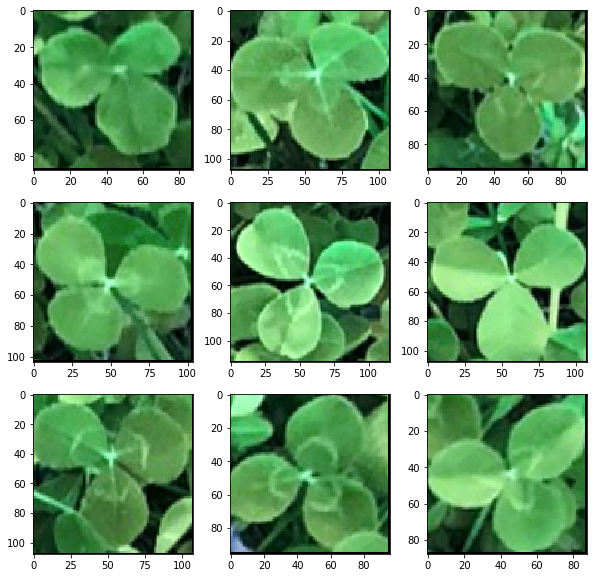

In [29]:
f, axarr = plt.subplots(3,3, figsize=(10,10))
for i in range(3):
    for j in range(3):
        axarr[i,j].imshow(raw_image_3leaf_clovers[3*i+j])

<h1>Reload the data in grescale and size everything to 128 x 128:</h1>

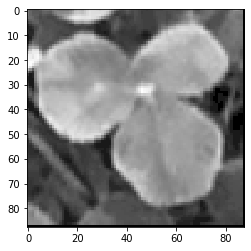

In [30]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [31]:
print(img_array)

[[ 92  78  74 ... 115 103   0]
 [ 99  84  74 ... 102 102   0]
 [ 96  84  76 ...  95  95   0]
 ...
 [116 115 114 ...  53  53   0]
 [118 117 116 ...  53  53   0]
 [  0   0   0 ...   0   0   0]]


In [32]:
img_array.shape

(88, 88)

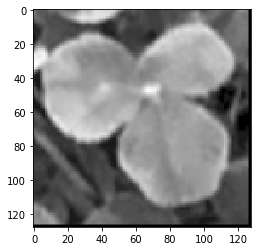

In [33]:
IMG_SIZE=128

new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


In [34]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
    

In [35]:
create_training_data()
print(len(training_data))
training_data

592


[[array([[ 92,  84,  77, ..., 106,  55,   0],
         [ 96,  88,  79, ..., 104,  54,   0],
         [ 98,  91,  82, ..., 100,  53,   0],
         ...,
         [117, 117, 116, ...,  53,  28,   0],
         [ 63,  62,  62, ...,  28,  15,   0],
         [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
  0],
 [array([[ 43,  43,  43, ..., 108,  89,   0],
         [ 43,  43,  43, ..., 111,  86,   0],
         [ 43,  43,  43, ..., 110,  85,   0],
         ...,
         [ 46,  43,  53, ..., 135, 103,   0],
         [ 43,  43,  54, ..., 103,  77,   0],
         [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
  0],
 [array([[ 95,  85,  78, ...,  52,  35,   0],
         [ 93,  82,  73, ...,  62,  39,   0],
         [ 90,  80,  70, ...,  74,  44,   0],
         ...,
         [107, 103,  98, ..., 145,  90,   0],
         [ 71,  68,  64, ...,  88,  55,   0],
         [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
  0],
 [array([[ 59,  71,  76, ..., 116,  83,   0],
         [ 45,  62,  

In [36]:
#Shuffle the categories
import random
random.shuffle(training_data)

In [44]:
X=[]
y=[]
for features, label in training_data:
    print(features)
    X.append(features)
    y.append(label)
    break;
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)



[[  0   0   0 ... 105  38   0]
 [  0   0   0 ... 105  38   0]
 [  0   0   0 ... 106  38   0]
 ...
 [138 138 138 ... 116  42   0]
 [ 50  50  50 ...  42  15   0]
 [  0   0   0 ...   0   0   0]]


In [13]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
0
1
1
0
1


<h1>Test a ML Model</h1>
<p> I followed a tutorial to create a Tensorflow Deep Learning ML model just for fun.  I've yet to take the Deep Learning training module, so I understand very little about the below code.  It take, however, take some troubleshooting and configuration just to get the model to work on my local PC

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [15]:
#normalize the model
X = X/255.0
X

array([[[[0.58823529],
         [0.58039216],
         [0.6       ],
         ...,
         [0.70588235],
         [0.74117647],
         [0.04705882]],

        [[0.62745098],
         [0.63529412],
         [0.65490196],
         ...,
         [0.7254902 ],
         [0.76078431],
         [0.04705882]],

        [[0.67843137],
         [0.70196078],
         [0.68627451],
         ...,
         [0.7372549 ],
         [0.76862745],
         [0.04705882]],

        ...,

        [[0.38039216],
         [0.38823529],
         [0.38431373],
         ...,
         [0.44313725],
         [0.43529412],
         [0.02745098]],

        [[0.37254902],
         [0.38039216],
         [0.38431373],
         ...,
         [0.5254902 ],
         [0.57254902],
         [0.03529412]],

        [[0.02352941],
         [0.02352941],
         [0.02352941],
         ...,
         [0.03529412],
         [0.03921569],
         [0.00392157]]],


       [[[0.53333333],
         [0.53333333],
         [0.53

In [16]:
y = np.array(y)

In [17]:
y

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [30]:
model = Sequential()


model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=7, validation_split=0.3)

Epoch 1/7
13/13 [==============================] - 19s 1s/step - loss: 1.4520 - accuracy: 0.5556 - val_loss: 0.6536 - val_accuracy: 0.7079
Epoch 2/7
13/13 [==============================] - 18s 1s/step - loss: 0.5967 - accuracy: 0.7077 - val_loss: 0.5776 - val_accuracy: 0.7528
Epoch 3/7
13/13 [==============================] - 19s 1s/step - loss: 0.4940 - accuracy: 0.7391 - val_loss: 0.5032 - val_accuracy: 0.7247
Epoch 4/7
13/13 [==============================] - 19s 1s/step - loss: 0.3718 - accuracy: 0.8333 - val_loss: 0.4911 - val_accuracy: 0.7416
Epoch 5/7
13/13 [==============================] - 19s 1s/step - loss: 0.2655 - accuracy: 0.9130 - val_loss: 0.5134 - val_accuracy: 0.7584
Epoch 6/7
13/13 [==============================] - 19s 1s/step - loss: 0.1777 - accuracy: 0.9348 - val_loss: 0.6035 - val_accuracy: 0.7809
Epoch 7/7
13/13 [==============================] - 19s 1s/step - loss: 0.1267 - accuracy: 0.9565 - val_loss: 0.5724 - val_accuracy: 0.7753
